# Text Classification

## Executive Summary

I performed binary sentiment analysis on the IMDb Movie Reviews dataset using multiple classification models. The text data was first prepared by converting the sentiment labels ('positive' and 'negative') into binary values (1 and 0). TF-IDF vectorization was applied to convert the raw reviews into numerical features, with stop words removed to reduce noise. 

I trained and evaluated five models: Linear SVC, Logistic Regression, Naive Bayes, Decision Tree, and K-Nearest Neighbors (KNN). Each model was assessed using accuracy, precision, recall, F1-score, and execution time. The performance results were visualized using bar plots and line plots, allowing for clear comparison across models. Linear SVC had the best overall performance in terms of both accuracy and F1-score, closely followed by Logistic Regression. Naive Bayes was also fast and performed well, while Decision Tree and KNN were slower and less accurate. Based on these results, Linear SVC is recommended for this task. 

Future improvements could include hyperparameter tuning, ensemble methods, and more advanced feature engineering.

In [1]:
# Imported required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import re
import string
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# It loads the dataset
df_IMBD = pd.read_csv(r'C:\Users\dccan\OneDrive\Desktop\Written\Lab-3\IMDB Dataset.csv')
df_IMBD

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Data Understanding Steps:

In [3]:
# It reprsents the number of columns presented in the data.
df_IMBD.columns

Index(['review', 'sentiment'], dtype='object')

In [4]:
df_IMBD.shape

(50000, 2)

In [5]:
# It shows the data types of the DataFrame's columns.
df_IMBD.dtypes

review       object
sentiment    object
dtype: object

In [6]:
# It shows the information of the DataFrame
df_IMBD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
# It shows the initial five rows of the DataFrame for reviewing its structure and content.
df_IMBD.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# It shows the final five rows of the DataFrame to review the end portion of the data.
df_IMBD.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [9]:
# It shows any null values in the dataframe
df_IMBD.isnull().sum()

review       0
sentiment    0
dtype: int64

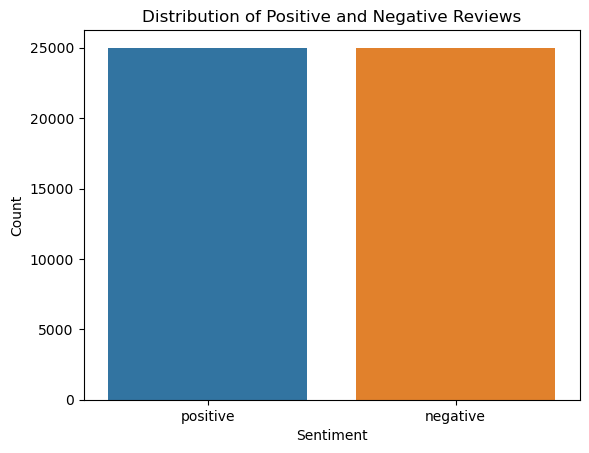

In [10]:
# Count the number of positive and negative reviews
sns.countplot(x='sentiment', data=df_IMBD)

# Set the title and labels
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

### Observation:
    
The above bar plot shows that the IMDb dataset has a nearly equal distribution of positive and negative reviews, with around 25,000 reviews in each category. This balanced distribution eliminates the need for techniques to handle class imbalance, such as oversampling or undersampling. As a result, the machine learning models can rely on metrics like accuracy without bias toward one class. This balance ensures that the models should perform fairly well for both positive and negative sentiment predictions.

In [11]:
# Prepare features (X) and target (y)

# Movie reviews (text data)
X = df_IMBD['review'] 

# Sentiment labels converted to binary (positive=1, negative=0)
y = df_IMBD['sentiment'].map({'positive': 1, 'negative': 0}) 

In [12]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting training and testing sets
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (35000,), Testing set: (15000,)


In [13]:
# Vectorize the text data using TfidfVectorizer, removing English stop words
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Print shapes of the transformed TF-IDF data
print(f"TF-IDF Vectorized Training set: {X_train_tfidf.shape}, Testing set: {X_test_tfidf.shape}")

TF-IDF Vectorized Training set: (35000, 87687), Testing set: (15000, 87687)


### Observation:
In the above ones, the movie reviews are extracted as features (X), and the sentiment labels are converted into binary values (y) where positive = 1 and negative = 0. The data is then split into training (70%) and testing (30%) sets, with 35,000 reviews for training and 15,000 for testing. TF-IDF vectorization is applied to convert the text data into numerical form, removing English stop words and ignoring terms that appear in more than 70% of documents. The transformed data results in 87,687 features, representing the unique terms across all reviews. Finally, the TF-IDF vectorized training and testing data shapes are printed to confirm the transformation.

In [14]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Measure the execution time
start_time = time.time()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

nb_time = time.time() - start_time

# Display results
print(f"Naive Bayes: Accuracy={nb_accuracy:.4f}, Precision={nb_precision:.4f}, Recall={nb_recall:.4f}, F1-score={nb_f1:.4f}, Time={nb_time:.4f} seconds")

Naive Bayes: Accuracy=0.8630, Precision=0.8786, Recall=0.8461, F1-score=0.8621, Time=0.0528 seconds


### Observation:
In the above, the Multinomial Naive Bayes model is trained using the TF-IDF vectorized training data. The execution time is measured for both training and prediction on the test data. The model's performance is evaluated using accuracy, precision, recall, and F1-score, with results showing an accuracy of 86.3%, precision of 87.9%, recall of 84.6%, and an F1-score of 86.2%. The model is also notably fast, with an execution time of only 0.0528 seconds.

In [15]:
# Linear SVC model
svc = LinearSVC(dual=False)

# Measure the execution time
start_time = time.time()

# Train the model
svc.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svc = svc.predict(X_test_tfidf)

# Calculate evaluation metrics
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)

svc_time = time.time() - start_time

# Display results
print(f"Linear SVC: Accuracy={svc_accuracy:.4f}, Precision={svc_precision:.4f}, Recall={svc_recall:.4f}, F1-score={svc_f1:.4f}, Time={svc_time:.4f} seconds")

Linear SVC: Accuracy=0.8945, Precision=0.8913, Recall=0.9013, F1-score=0.8963, Time=0.7638 seconds


### Observation:
In the above, the Linear SVC model is trained on the TF-IDF vectorized training data. The model achieves an accuracy of 89.45%, precision of 89.13%, recall of 90.13%, and an F1-score of 89.63%. The execution time for training and testing is relatively fast at 0.7638 seconds. These results indicate that Linear SVC is highly effective for sentiment classification.

In [16]:
# Logistic Regression model
logreg = LogisticRegression()

# Measure the execution time
start_time = time.time()

# Train the model
logreg.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test_tfidf)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

logreg_time = time.time() - start_time

# Display results
print(f"Logistic Regression: Accuracy={logreg_accuracy:.4f}, Precision={logreg_precision:.4f}, Recall={logreg_recall:.4f}, F1-score={logreg_f1:.4f}, Time={logreg_time:.4f} seconds")

Logistic Regression: Accuracy=0.8931, Precision=0.8849, Recall=0.9067, F1-score=0.8957, Time=1.5117 seconds


### Observation:
In the above, the Logistic Regression model is trained using the TF-IDF vectorized data. The model achieves an accuracy of 89.31%, precision of 88.49%, recall of 90.67%, and an F1-score of 89.57%. The execution time is slightly longer at 1.5117seconds compared to other models. Overall, the model performs well, with strong metrics for sentiment classification.

In [17]:
# CART Decision Tree model
cart = DecisionTreeClassifier()

# Measure the execution time
start_time = time.time()

# Train the model
cart.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_cart = cart.predict(X_test_tfidf)

# Calculate evaluation metrics
cart_accuracy = accuracy_score(y_test, y_pred_cart)
cart_precision = precision_score(y_test, y_pred_cart)
cart_recall = recall_score(y_test, y_pred_cart)
cart_f1 = f1_score(y_test, y_pred_cart)

cart_time = time.time() - start_time

# Display results
print(f"CART Decision Tree: Accuracy={cart_accuracy:.4f}, Precision={cart_precision:.4f}, Recall={cart_recall:.4f}, F1-score={cart_f1:.4f}, Time={cart_time:.4f} seconds")

CART Decision Tree: Accuracy=0.7255, Precision=0.7329, Recall=0.7199, F1-score=0.7263, Time=111.2518 seconds


### Observation:
In the above, the CART Decision Tree model is trained using the TF-IDF vectorized data. It achieves an accuracy of 72.55%, precision of 73.30%, recall of 72%, and an F1-score of 72.63%. However, the model is relatively slow, with an execution time of 111.2518 seconds, making it less efficient compared to other models in terms of speed and accuracy.

In [18]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Measure the execution time
start_time = time.time()

# Train the model
knn.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_tfidf)

# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

knn_time = time.time() - start_time

# Display results
print(f"KNN: Accuracy={knn_accuracy:.4f}, Precision={knn_precision:.4f}, Recall={knn_recall:.4f}, F1-score={knn_f1:.4f}, Time={knn_time:.4f} seconds")

KNN: Accuracy=0.7701, Precision=0.7630, Recall=0.7914, F1-score=0.7769, Time=376.0832 seconds


### Observation:
In this step, the K-Nearest Neighbors (KNN) model is trained using the TF-IDF vectorized data. It achieves an accuracy of 77.01%, precision of 76.30%, recall of 79.14%, and an F1-score of 77.69%. However, the model is significantly slower, with an execution time of 376.83 seconds, making it the least efficient model in terms of speed while offering moderate performance in terms of accuracy and F1-score.

In [19]:
# Gather results for all models
results = []

# Naive Bayes
results.append({
    "Model": "Naive Bayes",
    "Accuracy": nb_accuracy,
    "Precision": nb_precision,
    "Recall": nb_recall,
    "F1-Score": nb_f1,
    "Execution Time (s)": nb_time
})

# Linear SVC
results.append({
    "Model": "Linear SVC",
    "Accuracy": svc_accuracy,
    "Precision": svc_precision,
    "Recall": svc_recall,
    "F1-Score": svc_f1,
    "Execution Time (s)": svc_time
})

# Logistic Regression
results.append({
    "Model": "Logistic Regression",
    "Accuracy": logreg_accuracy,
    "Precision": logreg_precision,
    "Recall": logreg_recall,
    "F1-Score": logreg_f1,
    "Execution Time (s)": logreg_time
})

# CART Decision Tree
results.append({
    "Model": "Decision Tree",
    "Accuracy": cart_accuracy,
    "Precision": cart_precision,
    "Recall": cart_recall,
    "F1-Score": cart_f1,
    "Execution Time (s)": cart_time
})

# K-Nearest Neighbors
results.append({
    "Model": "KNN",
    "Accuracy": knn_accuracy,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1-Score": knn_f1,
    "Execution Time (s)": knn_time
})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score  \
0          Naive Bayes  0.863000   0.878626  0.846093  0.862053   
1           Linear SVC  0.894467   0.891321  0.901305  0.896285   
2  Logistic Regression  0.893133   0.884902  0.906707  0.895672   
3        Decision Tree  0.725533   0.732895  0.719858  0.726318   
4                  KNN  0.770067   0.762957  0.791409  0.776923   

   Execution Time (s)  
0            0.052839  
1            0.763832  
2            1.511706  
3          111.251810  
4          376.083170  


### Observation:
The above table summarizes the performance of five classification models: Naive Bayes, Linear SVC, Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN). Linear SVC had the highest accuracy (89.45%) and F1-score (89.63%), making it the best overall performer. Naive Bayes was fast and achieved a solid accuracy of 86.3% with a very short execution time of 0.05 seconds. Logistic Regression closely followed with an accuracy of 89.31% and a slightly longer execution time of 1.51 seconds. Both Decision Tree and KNN performed significantly worse in terms of accuracy (72.55% and 77.01%, respectively) and had much longer execution times, especially KNN, which took 376.83 seconds to complete. Based on these metrics, Linear SVC stands out as the top choice for sentiment classification.

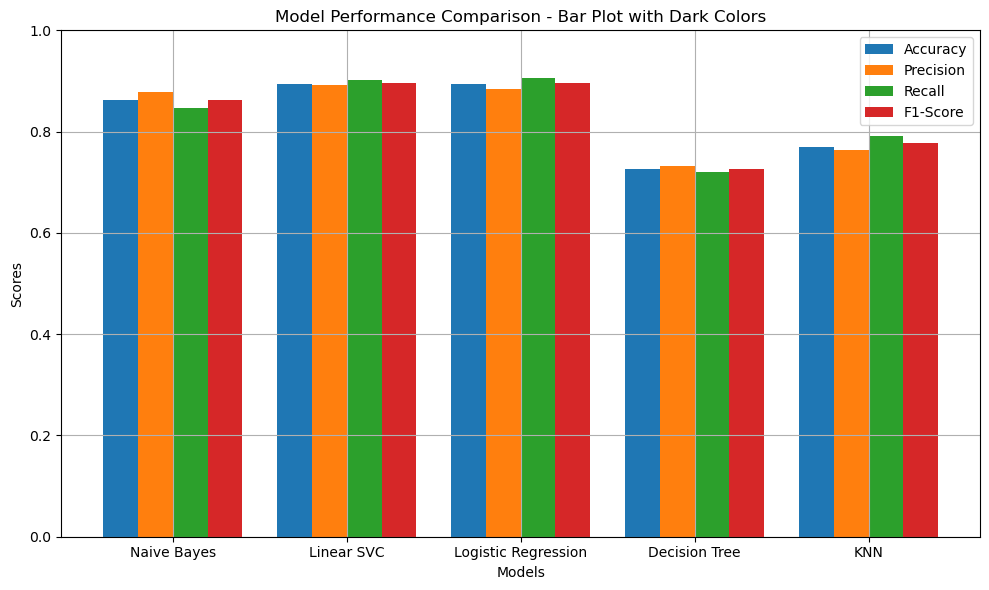

In [20]:
# Set up bar width and positions
bar_width = 0.2
index = np.arange(len(results_df['Model']))

# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Plot bars for each metric with darker colors
plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='#1f77b4') 
plt.bar(index + bar_width, results_df['Precision'], bar_width, label='Precision', color='#ff7f0e') 
plt.bar(index + 2 * bar_width, results_df['Recall'], bar_width, label='Recall', color='#2ca02c') 
plt.bar(index + 3 * bar_width, results_df['F1-Score'], bar_width, label='F1-Score', color='#d62728')  

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison - Bar Plot with Dark Colors')

# Labels to prevent overlap
plt.xticks(index + 1.5 * bar_width, results_df['Model'])

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add a legend to the plot
plt.legend()

# Use tight layout to ensure labels are not cut off
plt.tight_layout()

# Display the plot
plt.grid(True)
plt.show()

### Observation:
This bar graph compares the performance of five models- Naive Bayes, Linear SVC, Logistic Regression, Decision Tree, and KNN-across four key metrics: accuracy, precision, recall, and F1-score. Both Linear SVC and Logistic Regression perform similarly and lead in all metrics, showing consistently high scores. Naive Bayes performs slightly lower but still remains competitive, especially in precision and F1-score. Decision Tree and KNN lag behind, with Decision Tree showing the weakest performance across all metrics. The graph highlights that Linear SVC and Logistic Regression are the most suitable models for this task, offering the best balance between all performance metrics.

### Recommendation:
Based on the analysis, Linear SVC is recommended as the best model for sentiment classification due to its high accuracy (89.45%), F1-score (89.63%), and relatively fast execution time (0.77 seconds). Logistic Regression also performed well and could be a suitable alternative, with similar accuracy and F1-score. Naive Bayes offers a good trade-off between performance and speed, making it a solid option if execution time is a priority. Decision Tree and KNN should be avoided for this task, as they underperform in accuracy and require significantly longer processing times.

### Improving Model Performance:
To improve model performance, hyperparameter tuning (e.g., adjusting the regularization parameter for SVC or Logistic Regression) could optimize model accuracy further. Ensemble methods like Random Forest or Gradient Boosting could be explored to improve performance over individual models. Incorporating n-grams or advanced text representations like word embeddings (Word2Vec or GloVe) might capture more contextual information from the reviews. Lastly, applying cross-validation could help ensure the model generalizes well to unseen data by reducing overfitting.